### Question 1. Find a minimum of 10 transaction level features based on their relative importance that contribute to an address being classified good or bad.

### data cleanup

In [89]:
import numpy as np
import pandas as pd

# replace this as path to data
df = pd.read_excel("../datasets/Ethlas dataset/Assignment_TrainingData.xlsx")

df.head(10)

,focal_addr,focal_addr_type,blacklist,last_ts,tot_txn,tot_val,min_val,max_val,sd2_val,unq_other_addr,days_diff_first_last,contract_creation,recv_txn,tot_val_recv,min_val_recv,max_val_recv,avg_val_recv,sd2_val_recv,unq_from_addr,days_diff_first_last_recv,sent_txn,tot_val_sent,min_val_sent,max_val_sent,avg_val_sent,sd2_val_sent,unq_to_addr,days_diff_first_last_sent,to_contract_txn,tot_val_to_contract,min_val_to_contract,max_val_to_contract,avg_val_to_contract,erc20_txn,sum_val_erc20,erc721_txn,sum_val_erc721
0,0x00000002de4e35b0838fe97e09bb26317c2e570c,contract address,0,2023-01-29 21:43:23,402,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,70.540139,0,402,0.000000e+00,0,0,0,0.000000e+00,1,70.540139,0,0.000000e+00,,,,NaN,0,NaN,0,,,,,0,,0,
1,0x0000000506063a51c6ce59906d8c40f7d7fe92a7,wallet address,1,2023-02-15 15:53:59,16,1.843963e+19,0.000000e+00,1.800000e+19,1.892915e+37,13,153.244306,16,0,0.000000e+00,,,,NaN,0,NaN,16,1.843963e+19,0,18000000000000000000,1152477150000000000,1.892915e+37,13,153.244306,10,0,0,0,0,3,0,0,
2,0x0000098a312e1244f313f83cac319603a97f4582,wallet address,1,2023-02-08 12:19:59,8792,1.500201e+19,0.000000e+00,1.000000e+18,1.703185e+33,1486,103.834028,8792,17,1.500000e+19,10000000000,1000000000000000000,882352942352941056,1.038062e+35,3,70.376528,8775,2.010000e+15,0,1000000000000000,229059829059.82901,2.278792e+26,1483,103.834028,8493,0,0,0,0,1356,0,4225,0
3,0x000677bbab0fea85506f5f63806d331c9c2df1ac,wallet address,0,2022-08-21 09:26:43,1,7.287733e+14,7.287733e+14,7.287733e+14,0.000000e+00,1,0.000000,0,0,0.000000e+00,,,,NaN,0,NaN,1,7.287733e+14,728773317111000,728773317111000,728773317111000,0.000000e+00,1,0.000000,0,,,,,0,,0,
4,0x000f4432a40560bbff1b581a8b7aded8dab80026,wallet address,1,2023-02-15 01:53:11,247,4.243310e+19,0.000000e+00,8.200000e+18,5.954650e+35,91,179.527037,247,0,0.000000e+00,,,,NaN,0,NaN,247,4.243310e+19,0,8200000000000000000,171793931174088992,5.954650e+35,91,179.527037,215,28801702000000000000,0,8200000000000000000,133961404651162000,30,10450000000000000000,17,550000000000000000
5,0x0013e1131707c692fb8093b2ca540bff4d8fde62,wallet address,0,2022-09-09 04:29:43,1,2.720863e+16,2.720863e+16,2.720863e+16,0.000000e+00,1,0.000000,0,0,0.000000e+00,,,,NaN,0,NaN,1,2.720863e+16,27208631050962900,27208631050962900,27208631050962900,0.000000e+00,1,0.000000,0,,,,,0,,0,
6,0x002418dd34b76845aa272f34c13cdbeb5a23910c,wallet address,0,2022-10-31 01:21:47,1,3.308973e+16,3.308973e+16,3.308973e+16,0.000000e+00,1,0.000000,0,0,0.000000e+00,,,,NaN,0,NaN,1,3.308973e+16,33089732087694000,33089732087694000,33089732087694000,0.000000e+00,1,0.000000,0,,,,,0,,0,
7,0x002bc2632ec91e229470e747534ca93da52bb266,contract address,1,2022-09-16 03:32:23,126,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,19,0.819861,126,126,0.000000e+00,0,0,0,0.000000e+00,19,0.819861,0,0.000000e+00,,,,NaN,0,NaN,0,,,,,0,,126,0
8,0x00304c84fd48f6812a3af19697ebda50c0967c99,wallet address,1,2023-02-08 23:16:47,6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5,179.815984,6,0,0.000000e+00,,,,NaN,0,NaN,6,0.000000e+00,0,0,0,0.000000e+00,5,179.815984,6,0,0,0,0,1,0,2,0
9,0x003cd9ad7c81a6e8de85007ce3aeebbc5170ff0e,wallet address,0,2022-12-26 11:07:11,58,4.574491e+17,0.000000e+00,2.500000e+17,1.454867e+33,6,63.749583,0,4,5.000000e+16,10000000000000000,20000000000000000,12500000000000000,1.875000e+31,2,29.130972,54,4.074491e+17,0,250000000000000000,7545353548278180,1.559553e+33,4,63.746528,53,250000000000000000,0,250000000000000000,4716981132075470,40,250000000000000000,0,


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6280 entries, 0 to 6279
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   focal_addr                 6280 non-null   object        
 1   focal_addr_type            6280 non-null   object        
 2   blacklist                  6280 non-null   int64         
 3   last_ts                    6280 non-null   datetime64[ns]
 4   tot_txn                    6280 non-null   int64         
 5   tot_val                    6280 non-null   float64       
 6   min_val                    6280 non-null   float64       
 7   max_val                    6280 non-null   float64       
 8   sd2_val                    6280 non-null   float64       
 9   unq_other_addr             6280 non-null   int64         
 10  days_diff_first_last       6280 non-null   float64       
 11  contract_creation          6280 non-null   int64         
 12  recv_t

In [91]:
# basic imputation of NaN values
df.fillna(df.mean(), inplace=True)

C:\Users\Manish Seal\AppData\Local\Temp\ipykernel_11936\754884957.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
C:\Users\Manish Seal\AppData\Local\Temp\ipykernel_11936\754884957.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


### Stratified sampling (ensures there is 50/50 proportion in output)

In [92]:
from sklearn.model_selection import StratifiedShuffleSplit

# Define the stratified sampler with 50/50 proportion
strat_sampler = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)

# Get the indices of the 0 and 1 blacklists
indices_0 = df.index[df['blacklist'] == 0].tolist()
indices_1 = df.index[df['blacklist'] == 1].tolist()

# Use the stratified sampler to split the indices of 0 and 1 blacklists
train_indices_0, test_indices_0 = next(strat_sampler.split(indices_0, df.loc[indices_0, 'blacklist']))
train_indices_1, test_indices_1 = next(strat_sampler.split(indices_1, df.loc[indices_1, 'blacklist']))

# Get the selected indices for the final dataset
min_len = min(len(train_indices_0), len(train_indices_1))
selected_indices = train_indices_0[:min_len] + train_indices_1[:min_len]

# Create the new dataframe with equal proportions of 0 and 1 blacklists
df_new = df.loc[selected_indices, :]

# Join the new dataframe with the previous data
df_final = pd.concat([df, df_new], axis=0).reset_index(drop=True)

In [93]:
# check if df_final is really stratified
df_final['blacklist'].value_counts()

0    4677
1    2754
Name: blacklist, dtype: int64

### downsampling

In [94]:
# since df_final is not stratified, we need to do downsampling
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_final[df_final['blacklist'] == 0]
df_minority = df_final[df_final['blacklist'] == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority), # to match minority class
                                   random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
df_final = pd.concat([df_majority_downsampled, df_minority]).reset_index(drop=True)

In [95]:
df_final['blacklist'].value_counts()

0    2754
1    2754
Name: blacklist, dtype: int64

In [96]:
df_final.head()

,focal_addr,focal_addr_type,blacklist,last_ts,tot_txn,tot_val,min_val,max_val,sd2_val,unq_other_addr,days_diff_first_last,contract_creation,recv_txn,tot_val_recv,min_val_recv,max_val_recv,avg_val_recv,sd2_val_recv,unq_from_addr,days_diff_first_last_recv,sent_txn,tot_val_sent,min_val_sent,max_val_sent,avg_val_sent,sd2_val_sent,unq_to_addr,days_diff_first_last_sent,to_contract_txn,tot_val_to_contract,min_val_to_contract,max_val_to_contract,avg_val_to_contract,erc20_txn,sum_val_erc20,erc721_txn,sum_val_erc721
0,0xa1ce123bd4030002e878b4a5fcfbe925b53ac324,wallet address,0,2022-10-05 00:36:47,1,3.414780e+16,3.414780e+16,3.414780e+16,0.000000e+00,1,0.000000,0,0,0.000000e+00,,,,1.062764e+41,0,32.714263,1,3.414780e+16,34147797617300000,34147797617300000,34147797617300000,0.000000e+00,1,0.000000,0,,,,,0,,0,
1,0x01d9bb2a7dd649356acbfc89ef68085efd1e3fb0,wallet address,0,2022-12-17 04:17:23,2,5.969200e+16,2.969200e+16,3.000000e+16,2.371600e+28,2,0.001250,0,1,3.000000e+16,30000000000000000,30000000000000000,30000000000000000,0.000000e+00,1,0.000000,1,2.969200e+16,29692000000000000,29692000000000000,29692000000000000,0.000000e+00,1,0.000000,0,,,,,0,,0,
2,0xed572add5fe0ca11c2a1d7c33f2d41034615b7d6,wallet address,0,2023-02-07 14:08:47,5,6.618486e+17,0.000000e+00,3.303995e+17,2.610402e+34,5,93.021944,0,3,3.314491e+17,545320000000000,330096980000000000,110483030245828992,2.411515e+34,3,92.991250,2,3.303995e+17,0,330399500656801984,165199750328400992,2.729096e+34,2,93.013056,1,0,0,0,0,1,0,0,
3,0x4f0546c360a338c9db681f4f06e2ae7def268e62,wallet address,0,2022-12-10 15:30:11,1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,0.000000,0,0,0.000000e+00,,,,1.062764e+41,0,32.714263,1,0.000000e+00,0,0,0,0.000000e+00,1,0.000000,1,0,0,0,0,1,0,0,
4,0xcd2fdfb159c9c26fa228f3560ea3f60fc70ebb98,wallet address,0,2022-08-22 21:27:00,3,3.047493e+16,4.734820e+14,1.585118e+16,4.738014e+31,3,0.020498,0,1,1.585118e+16,15851176474317900,15851176474317900,15851176474317900,0.000000e+00,1,0.000000,2,1.462376e+16,473481959604284,14150276474317900,7311879216961100,4.676368e+31,2,0.020301,1,14150276474317900,14150276474317900,14150276474317900,14150276474317900,0,,0,


In [97]:
df_label = df_final['blacklist']

In [98]:
df_label.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5508 entries, 0 to 5507
Series name: blacklist
Non-Null Count  Dtype
--------------  -----
5508 non-null   int64
dtypes: int64(1)
memory usage: 43.2 KB


In [99]:
# removing the non-transaction features (focal_addr included because it is a Unique Identifier)
df_feature_transactions = df_final.drop(['last_ts', 'blacklist', 'days_diff_first_last', 'days_diff_first_last_recv','focal_addr'], axis=1)

In [100]:
# further data cleanup
from sklearn.preprocessing import LabelEncoder

# create label encoder object
le = LabelEncoder()

# fit and transform the focal_addr_type column
df_feature_transactions['focal_addr_type'] = le.fit_transform(df_feature_transactions['focal_addr_type']) # converting focal_addr type to int32 as it may contain useful info

In [101]:
# dealing with the received, sent, total and sum transaction values
cols_to_convert = ['min_val_recv', 'max_val_recv', 'avg_val_recv', 'min_val_sent', 'max_val_sent', 'avg_val_sent', 'tot_val_to_contract',
                   'min_val_to_contract', 'max_val_to_contract', 'avg_val_to_contract', 'sum_val_erc20', 'sum_val_erc721']
df_feature_transactions[cols_to_convert] = df_feature_transactions[cols_to_convert].replace(
    '', 0)

df_feature_transactions[cols_to_convert] = df_feature_transactions[cols_to_convert].apply(
    pd.to_numeric)

In [102]:
df_feature_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5508 entries, 0 to 5507
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   focal_addr_type            5508 non-null   int32  
 1   tot_txn                    5508 non-null   int64  
 2   tot_val                    5508 non-null   float64
 3   min_val                    5508 non-null   float64
 4   max_val                    5508 non-null   float64
 5   sd2_val                    5508 non-null   float64
 6   unq_other_addr             5508 non-null   int64  
 7   contract_creation          5508 non-null   int64  
 8   recv_txn                   5508 non-null   int64  
 9   tot_val_recv               5508 non-null   float64
 10  min_val_recv               5508 non-null   float64
 11  max_val_recv               5508 non-null   float64
 12  avg_val_recv               5508 non-null   float64
 13  sd2_val_recv               5508 non-null   float

In [103]:
# Set the options to display all columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Summary stats
print(df_feature_transactions.describe())

       focal_addr_type       tot_txn       tot_val       min_val  \
count      5508.000000   5508.000000  5.508000e+03  5.508000e+03   
mean          0.949710     46.597495  1.216062e+20  5.944071e+18   
std           0.218564    350.647818  2.497270e+21  4.258655e+20   
min           0.000000      1.000000  0.000000e+00  0.000000e+00   
25%           1.000000      2.000000  7.582000e+15  0.000000e+00   
50%           1.000000      5.000000  1.587074e+17  0.000000e+00   
75%           1.000000     22.000000  1.867677e+18  1.062440e+15   
max           1.000000  15161.000000  1.105386e+23  3.160245e+22   

            max_val       sd2_val  unq_other_addr  contract_creation  \
count  5.508000e+03  5.508000e+03     5508.000000        5508.000000   
mean   6.452012e+19  8.851887e+40       18.034858          42.253813   
std    1.646551e+21  3.002158e+42      226.475730         346.216252   
min    0.000000e+00 -1.152922e+18        1.000000           0.000000   
25%    5.995492e+15  0.0000

for analysis purposes, we will need to use a standard scaler to adust the columns with a high range

In [104]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Normalize the data
df_feature_transactions_scaled = pd.DataFrame(scaler.fit_transform(df_feature_transactions),columns=df_feature_transactions.columns)

In [105]:
# adjusting the labels
df_label_filtered = df_label.loc[df_feature_transactions_scaled.index]

### Feature selection

In [106]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier object
rfc = RandomForestClassifier(random_state=42)

# Fit the classifier on the scaled transaction level features and label data
rfc.fit(df_feature_transactions_scaled, df_label_filtered.values.ravel())

# Get the feature importances from the trained classifier
feature_importances = rfc.feature_importances_

# Get the column names of the scaled transaction level features
feature_names = df_feature_transactions_scaled.columns

# Create a dictionary of feature names and their corresponding importances
feature_importances_dict = dict(zip(feature_names, feature_importances))

# Sort the features by importance in descending order and select the top 10
top_features = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 features and their importances
print("{:<20} {}".format("Feature", "Score"))
print("-" * 30)
for feature, importance in top_features:
    print("{:<20} {:.2f}".format(feature, importance))

Feature              Score
------------------------------
contract_creation    0.48
unq_to_addr          0.07
erc20_txn            0.06
tot_txn              0.05
sent_txn             0.05
unq_other_addr       0.04
erc721_txn           0.03
min_val_recv         0.03
to_contract_txn      0.02
avg_val_recv         0.02


### Question 2. Given a new wallet address and its transaction history, output a prediction score whether the address is good or bad.

In [107]:
# using logistic regressions and hyperparam tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define the new features to use for training the model
features = ['contract_creation', 'erc20_txn', 'unq_to_addr', 'erc721_txn', 'unq_other_addr', 'sent_txn', 'tot_txn', 'recv_txn', 'to_contract_txn', 'unq_from_addr']

# train-test-split
X_train, X_test, y_train, y_test = train_test_split(df_feature_transactions_scaled[features], df_label_filtered, test_size=0.2, random_state=42)

# Define the hyperparameters to tune
hyperparameters = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Create a GridSearchCV object with logistic regression as the estimator
grid_search = GridSearchCV(LogisticRegression(random_state=42), hyperparameters, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
score = model.score(X_test, y_test)
print(f"Validation Accuracy: {score}")

# get full classification report
y_pred = best_model.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

Validation Accuracy: 0.9437386569872959
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       571
           1       1.00      0.89      0.94       531

    accuracy                           0.94      1102
   macro avg       0.95      0.94      0.94      1102
weighted avg       0.95      0.94      0.94      1102



c:\Users\Manish Seal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Manish Seal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
---------------------------------------------------

### confusion matrix

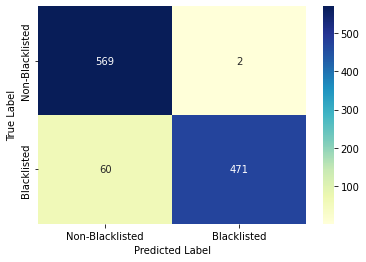

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", fmt="d", xticklabels=["Non-Blacklisted", "Blacklisted"], yticklabels=["Non-Blacklisted", "Blacklisted"])

# Set the axis labels
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Show the plot
plt.show()

### Prediction scores output:

In [110]:
# subsetting the data for 10 most important features
data_subset = df_feature_transactions_scaled[features]
predictions = best_model.predict_proba(data_subset)

In [111]:
# 0th index means probability of 0 label
# 1st index means probability of 1 label
predictions

array([[8.13318624e-01, 1.86681376e-01],
       [8.66295610e-01, 1.33704390e-01],
       [9.20206889e-01, 7.97931105e-02],
       ...,
       [1.99840144e-15, 1.00000000e+00],
       [7.86186982e-03, 9.92138130e-01],
       [9.06867168e-08, 9.99999909e-01]])

In [112]:
trustworthy_scores = pd.DataFrame({'Trustworthy Score': predictions[:, 0]})
trustworthy_scores = trustworthy_scores.round(2)
trustworthy_scores.head(10)

,Trustworthy Score
0,0.81
1,0.87
2,0.92
3,0.79
4,0.87
5,0.81
6,0.87
7,0.97
8,0.80
9,0.88


In [113]:
# Get the trustworthy scores dataframe
trustworthy_scores_df = trustworthy_scores

# Merge the trustworthy scores dataframe with the original dataframe
merged_df = pd.concat([df_final, trustworthy_scores_df], axis=1)

# Select only the relevant columns
result_df = merged_df[['focal_addr', 'focal_addr_type',
                       'Trustworthy Score', 'blacklist']]

In [114]:
# dataframe for focal addresses, trustworthy score, blacklists and expected blacklists
result_df['expected_blacklist'] = result_df['Trustworthy Score'].apply(lambda x: 0 if x > 0.5 else 1)
result_df.head()

C:\Users\Manish Seal\AppData\Local\Temp\ipykernel_11936\4238500627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['expected_blacklist'] = result_df['Trustworthy Score'].apply(lambda x: 0 if x > 0.5 else 1)


,focal_addr,focal_addr_type,Trustworthy Score,blacklist,expected_blacklist
0,0xa1ce123bd4030002e878b4a5fcfbe925b53ac324,wallet address,0.81,0,0
1,0x01d9bb2a7dd649356acbfc89ef68085efd1e3fb0,wallet address,0.87,0,0
2,0xed572add5fe0ca11c2a1d7c33f2d41034615b7d6,wallet address,0.92,0,0
3,0x4f0546c360a338c9db681f4f06e2ae7def268e62,wallet address,0.79,0,0
4,0xcd2fdfb159c9c26fa228f3560ea3f60fc70ebb98,wallet address,0.87,0,0


In [115]:
# Calculate accuracy
accuracy = sum(result_df['blacklist'] == result_df['expected_blacklist']) / len(result_df)

# Print accuracy
print('Total Accuracy:', accuracy)

Total Accuracy: 0.9320987654320988
